In [40]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [43]:
def load_data(i=0):
    robjects.r['load']("../data/gaussSim_and.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [44]:
X, y = load_data(42)

In [45]:
rf = rfc()

In [46]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

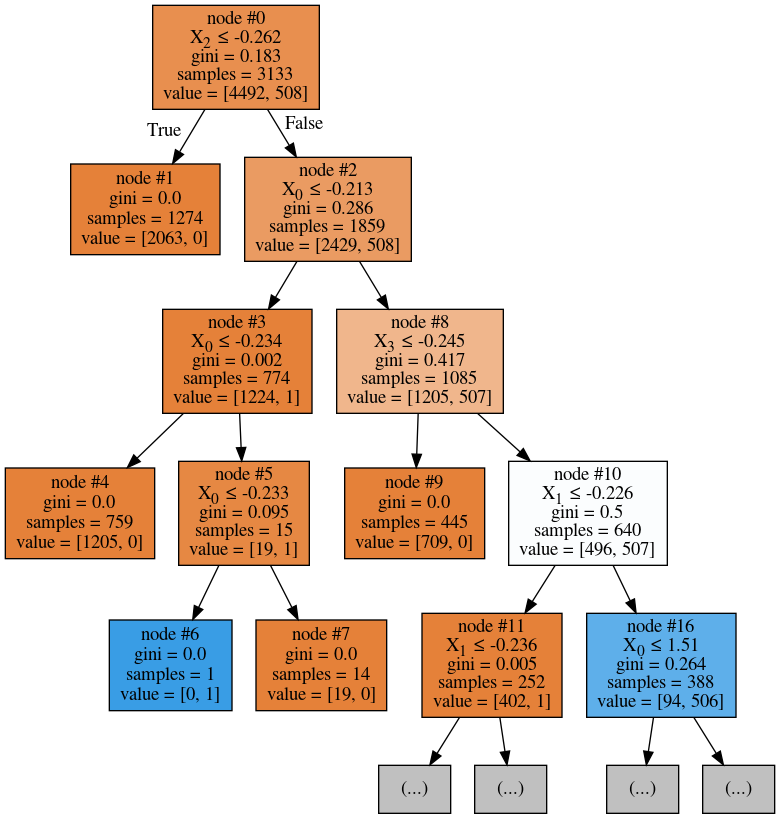

In [47]:
draw_tree(rf.estimators_[0], max_depth=4)

<BarContainer object of 50 artists>

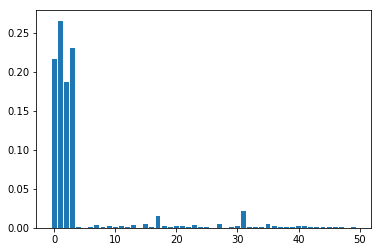

In [48]:
plt.bar(np.arange(50), rf.feature_importances_)

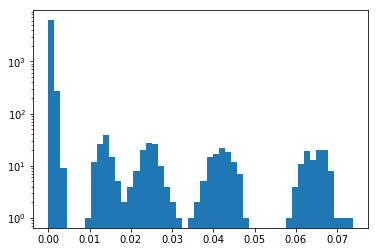

In [49]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [50]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.005,
    min_support=rf.n_paths // 32,
    signed=True,
    weight_scheme="depth",
)

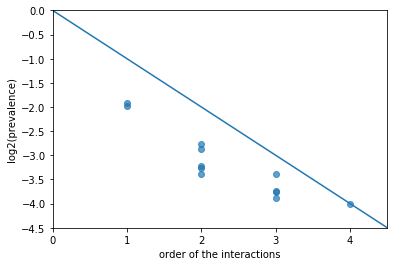

In [51]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [52]:
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.06250000000000025),
 (((0, 'R'), (2, 'R'), (3, 'R')), 0.09562500000000088),
 (((0, 'R'), (1, 'R'), (2, 'R')), 0.07500000000000044),
 (((1, 'R'), (2, 'R'), (3, 'R')), 0.07437500000000033),
 (((0, 'R'), (1, 'R'), (3, 'R')), 0.06750000000000032),
 (((0, 'R'), (2, 'R')), 0.14687500000000162),
 (((2, 'R'), (3, 'R')), 0.13750000000000134),
 (((1, 'R'), (2, 'R')), 0.10687500000000104),
 (((0, 'R'), (3, 'R')), 0.10437500000000091),
 (((1, 'R'), (3, 'R')), 0.09562500000000095),
 (((2, 'R'),), 0.2637500000000027),
 (((0, 'R'),), 0.2543750000000028)]

## Simulation 2: OR rule

In [54]:
def load_data(i=0):
    robjects.r['load']("../data/gaussSim_or.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [55]:
X, y = load_data(10)

In [56]:
rf = rfc()

In [57]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

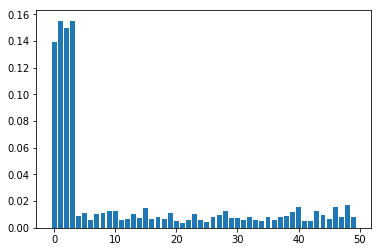

In [58]:
plt.bar(np.arange(50), rf.feature_importances_)

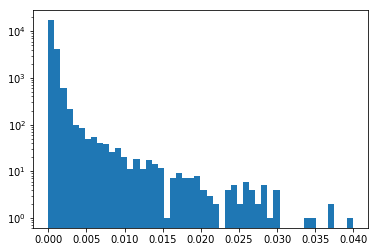

In [59]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [60]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=1e-3,
    min_support=rf.n_paths // 2 ** 5,
    signed=True,
    weight_scheme="depth",
)

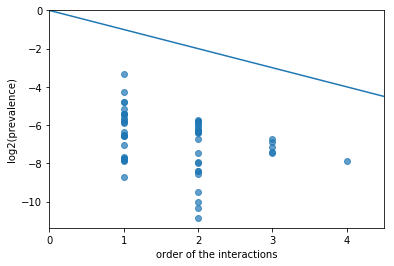

In [61]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [62]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'L'), (3, 'L')), 0.004294547159224744),
 (((1, 'L'), (2, 'R'), (3, 'R')), 0.00951637139560317),
 (((0, 'R'), (1, 'R'), (2, 'L')), 0.008334474321819699),
 (((0, 'R'), (1, 'R'), (3, 'L')), 0.007175054169638313),
 (((1, 'R'), (2, 'L'), (3, 'L')), 0.005904635675251477),
 (((0, 'R'), (2, 'L'), (3, 'L')), 0.005760911619295251),
 (((1, 'L'), (2, 'R')), 0.018562051211648573),
 (((0, 'L'), (3, 'R')), 0.01804038376711104),
 (((2, 'R'), (3, 'R')), 0.01745592254390485),
 (((0, 'R'), (1, 'R')), 0.017289203196489775),
 (((0, 'R'), (3, 'L')), 0.01564049125875045),
 (((0, 'R'), (2, 'L')), 0.014902057927475896),
 (((0, 'R'), (2, 'R')), 0.013632831025835224),
 (((0, 'L'), (1, 'L')), 0.01303312455354897),
 (((2, 'L'), (3, 'L')), 0.01239752256311933),
 (((1, 'R'), (3, 'L')), 0.012387348560441734),
 (((0, 'L'), (2, 'R')), 0.01236534018216843),
 (((1, 'L'), (3, 'R')), 0.011900902914531431),
 (((0, 'R'),), 0.099235938478237),
 (((0, 'R'), (3, 'R')), 0.009295634862432955)]

## Simulation 3: Add rule

In [63]:
def load_data(i=0):
    robjects.r['load']("../data/gaussSim_add.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [64]:
X, y = load_data(5)

In [65]:
rf = rfc(bootstrap=True)

In [66]:
rf.fit(X, y, keep_record=False, K=10)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

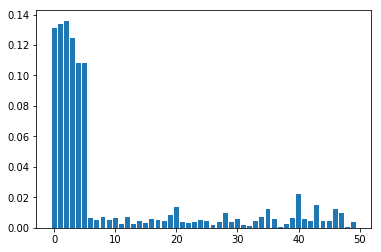

In [67]:
plt.bar(np.arange(50), rf.feature_importances_)

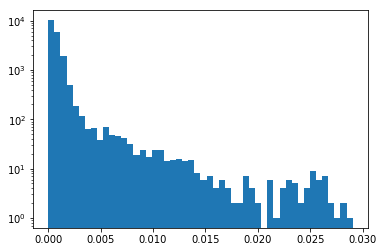

In [68]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [69]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.001,
    min_support=rf.n_paths // 2 ** 7,
    signed=True,
    weight_scheme="samplesize",
)

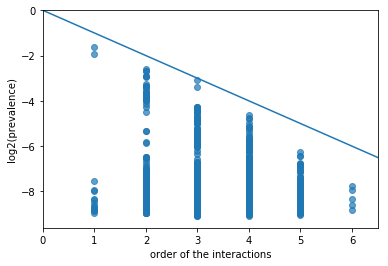

In [70]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [71]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R')), 0.11824400000000639),
 (((3, 'R'), (4, 'R'), (5, 'R')), 0.09427000000000423),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'L')), 0.0405079999999998),
 (((0, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.03702799999999969),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.03551599999999974),
 (((0, 'R'), (3, 'R'), (4, 'R'), (5, 'R')), 0.0314819999999996),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R'), (5, 'R')), 0.013010000000000091),
 (((1, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.028949999999999677),
 (((0, 'R'), (1, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.011598000000000063),
 (((0, 'R'), (1, 'R'), (2, 'R'), (4, 'R')), 0.027963999999999753),
 (((0, 'R'), (2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.011430000000000051),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R'), (4, 'R'), (5, 'R')),
  0.004631999999999998),
 (((0, 'R'), (1, 'R'), (2, 'R'), (5, 'R')), 0.027219999999999713),
 (((0, 'R'), (2, 'R')), 0.1641600000000107),
 (((2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.02602999999999